<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework04/blob/main/Con_l%E1%BA%AFc_ng%C6%B0%E1%BB%A3c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=1a1f02e33c36e1fb748751818f388cc47411515a25ee811aea0562e01257aa47
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import  numpy as np
import skfuzzy as fzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d 

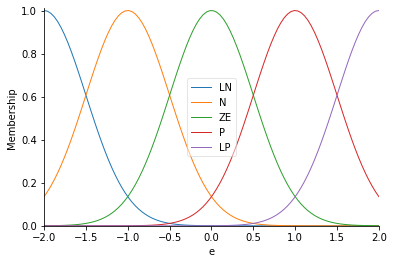

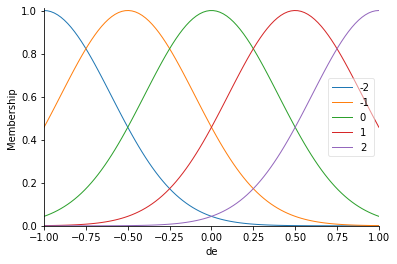

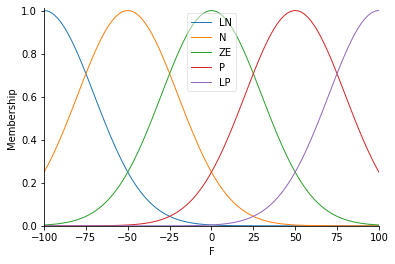

In [10]:
Universe_1 = np.linspace(-2,2,100) #food 
Universe_2 = np.linspace(-1,1,100) #service
Universe_3 = np.linspace(-100,100,100) # tip

### tạo biến đầu vào 
e = ctrl.Antecedent(Universe_1,'e')
de= ctrl.Antecedent(Universe_2,'de')
F = ctrl.Consequent(Universe_3,'F')

e['LN'] = fzz.gaussmf(e.universe,-2,0.5)
e['N'] = fzz.gaussmf(e.universe,-1,0.5)
e['ZE'] = fzz.gaussmf(e.universe,0,0.5)
e['P'] = fzz.gaussmf(e.universe,1,0.5)
e['LP'] = fzz.gaussmf(e.universe,2,0.5)
e.view()

de['-2'] = fzz.gaussmf(de.universe,-1,0.4)
de['-1'] = fzz.gaussmf(de.universe,-0.5,0.4)
de['0'] = fzz.gaussmf(de.universe,0,0.4)
de['1'] = fzz.gaussmf(de.universe,0.5,0.4)
de['2'] = fzz.gaussmf(de.universe,1,0.4)
de.view()

F['LN'] = fzz.gaussmf(F.universe,-100,30)
F['N'] = fzz.gaussmf(F.universe,-50,30)
F['ZE'] = fzz.gaussmf(F.universe,0,30)
F['P'] = fzz.gaussmf(F.universe,50,30)
F['LP'] = fzz.gaussmf(F.universe,100,30)
F.view()

In [11]:
#rule
rule = []

rule.append(ctrl.Rule(antecedent=(e['LN'] & de['-2'])|(e['LN'] & de['-1'])|
(e['N'] & de['-2']), consequent=F['LN'], label='Rule LN'))

rule.append(ctrl.Rule(antecedent=(e['ZE'] & de['-2'])|(e['N'] & de['-1'])|
(e['N'] & de['0'])|(e['N'] & de['1'])|(e['N'] & de['2'])|
(e['LN'] & de['0'])|(e['LN'] & de['1'])|(e['LN'] & de['2']), consequent=F['N'], label='Rule N'))

rule.append(ctrl.Rule(antecedent=(e['ZE'] & de['-1'])|(e['ZE'] & de['0'])|
(e['ZE'] & de['1'])|(e['ZE'] & de['2'])|(e['P'] & de['-2']), consequent=F['ZE'], label='Rule ZE'))

rule.append(ctrl.Rule(antecedent=((e['LP'] & de['-2'])|(e['LP'] & de['-1'])|
(e['LP'] & de['0']) | (e['P'] & de['-1']) | (e['P'] & de['0'])), consequent=F['P'], label='Rule P'))

rule.append(ctrl.Rule(antecedent=(e['P'] & de['1'])|(e['P'] & de['2'])|
(e['LP'] & de['1'])|(e['LP'] & de['2']), consequent=F['LP'], label='Rule LP'))

In [31]:
from networkx.algorithms.bipartite import projection
#control
system = ctrl.ControlSystem(rule)
simulation = ctrl.ControlSystemSimulation(system,flush_after_run = 100*100+1)

upsampled = np.linspace(-2,2,100)
x,y = np.meshgrid(upsampled, upsampled)
z   = np.zeros_like(x)
for i in range(100) :
  for j in range(100) :
    simulation.input['e'] = x[i,j]
    simulation.input['de'] = y[i,j]
    simulation.compute()

    z[i,j] = simulation.output['F']

<ipython-input-34-da2140a6372d>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = -85, cmap = 'viridis', anpha = 0.5)
<ipython-input-34-da2140a6372d>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 2.5, cmap = 'viridis', anpha = 0.5)
<ipython-input-34-da2140a6372d>:7: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = -2.5, cmap = 'viridis', anpha = 0.5)


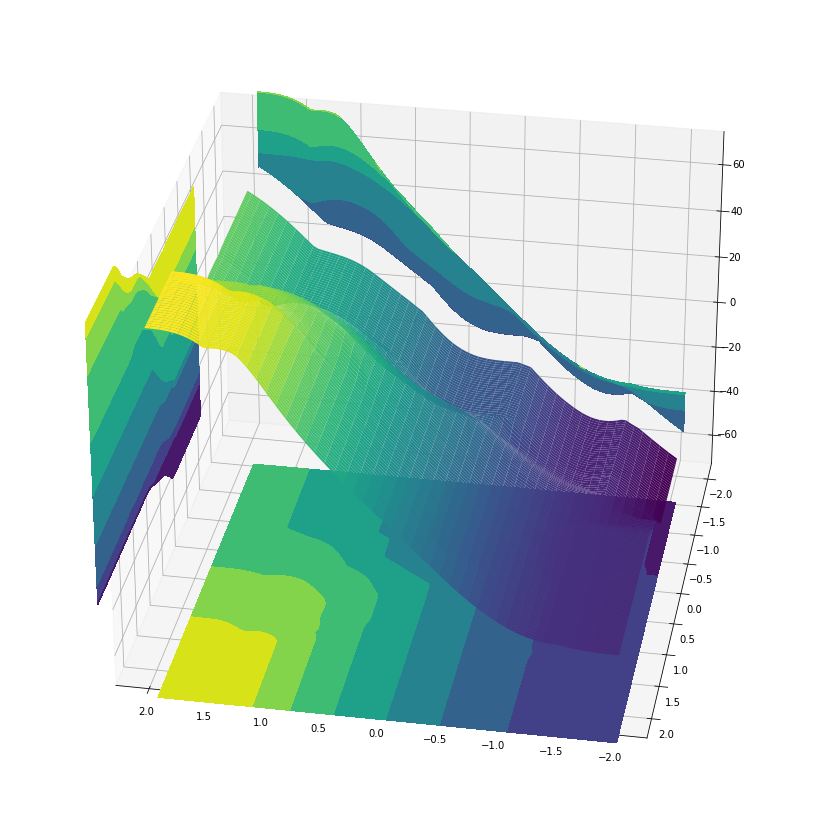

In [34]:
#Xuất đồ thị hình 8x * 8y
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 2, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = -85, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 2.5, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x,y,z, zdir = 'y', offset = -2.5, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,100)